In [2]:
#package imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#data import
df = pd.read_csv('player_all_time.csv')

#show first few rows
print(df.head(5))

   Unnamed: 0          Player    G  GLS   GPG  AST   APG  BLK   BPG  + / -  \
0           0   Cameron Brock  120  504  4.20  230  1.92   48  0.40    570   
1           1     Keenan Plew  116  286  2.47  358  3.09   32  0.28    455   
2           2      Matt Smith   81  266  3.28  132  1.63   45  0.56    360   
3           3    Matt Stevens  101  259  2.56   42  0.42   29  0.29    291   
4           4  Cameron Harris  103  258  2.50  301  2.92  109  1.06    446   

   +/- PG   CMP    CPG  CMP %    PP    PPG  
0    4.75  1527  12.73   90.0  2523  21.03  
1    3.92  3584  30.90   95.2  2426  20.91  
2    4.44  1580  19.51   96.5  1678  20.72  
3    2.88   686   6.79   95.8  1532  15.17  
4    4.33  1846  17.92   90.9  2163  21.00  


In [4]:
#describe data

df.describe()

,Unnamed: 0,G,GLS,GPG,AST,APG,BLK,BPG,+ / -,+/- PG,CMP,CPG,CMP %,PP,PPG
count,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.00000
mean,14.472648,20.164114,21.915536,0.868495,21.875711,0.817466,12.694967,0.532035,32.029759,1.163821,240.470460,9.749239,89.134967,332.470897,14.81295
std,8.667823,17.937079,34.599173,0.779689,36.422258,0.821713,17.993022,0.400081,54.891630,1.261277,367.930407,9.047265,13.933888,362.918564,5.75148
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.000000,-3.630000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,7.000000,8.000000,3.000000,0.330000,2.000000,0.230000,2.000000,0.250000,2.000000,0.330000,30.000000,3.310000,88.000000,86.000000,11.22000
50%,14.000000,14.000000,9.000000,0.670000,8.000000,0.580000,7.000000,0.480000,12.000000,1.000000,100.000000,6.870000,91.400000,205.000000,15.00000
75%,22.000000,28.000000,27.000000,1.200000,25.000000,1.170000,16.000000,0.730000,39.000000,1.780000,282.000000,13.400000,94.400000,454.000000,18.90000
max,29.000000,120.000000,504.000000,5.800000,358.000000,6.240000,171.000000,4.500000,570.000000,7.620000,3661.000000,60.000000,100.000000,2523.000000,32.25000


In [5]:
#drop unnecessary column
df = df.drop(labels=['Unnamed: 0'], axis=1)
df.shape

#Get rid of players who haven't played any points
no_games_df = df[df['PP']==0]
print(no_games_df.head())
del no_games_df

#Two players (Scott Boehm and Chris Malackany) have zero points played. Somehow Malackany still has a single completion as part of their record. These players are outliers and need to be dropped
df = df[df['PP'] > 0]
print(f"New shape = {df.shape}")

               Player  G  GLS  GPG  AST  APG  BLK  BPG  + / -  +/- PG  CMP  \
2133      Scott Boehm  2    0  0.0    0  0.0    0  0.0      0     0.0    0   
2271  Chris Malackany  9    0  0.0    0  0.0    0  0.0      0     0.0    1   

       CPG  CMP %  PP  PPG  
2133  0.00    0.0   0  0.0  
2271  0.11  100.0   0  0.0  
New shape = (2283, 15)


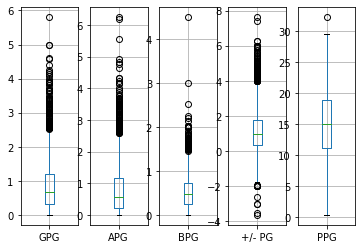

In [6]:
#box plots for [goals, assists, blocks, +/-, points played] per game
fig, axs = plt.subplots(1, 5)

df.boxplot('GPG', ax=axs[0])
df.boxplot('APG', ax=axs[1])
df.boxplot('BPG', ax=axs[2])
df.boxplot('+/- PG', ax=axs[3])
df.boxplot('PPG', ax=axs[4])


There seem to be a good number of outliers in the GPG, APG, BPG, and +/- PG categories. We've removed all players with zero points played. The large amount of overlap makes me wonder how much overlap there is in these groups.

In [7]:
#games played in ascending order
df['G'].value_counts().sort_index(ascending=True)

1       86
2       76
3       58
4       83
5       80
6       82
7      100
8       80
9       90
10      93
11      79
12      86
13      84
14      69
15      42
16      91
17      47
18      54
19      32
20      34
21      42
22      42
23      36
24      52
25      30
26      28
27      32
28      32
29      32
30      26
      ... 
69       3
70       3
72       5
73       5
74       4
75       1
76       2
78       1
79       5
80       2
81       1
83       1
84       2
86       1
88       1
90       1
95       1
96       1
97       3
98       1
99       2
101      1
102      1
103      2
106      1
107      1
108      1
111      1
116      1
120      1
Name: G, Length: 98, dtype: int64

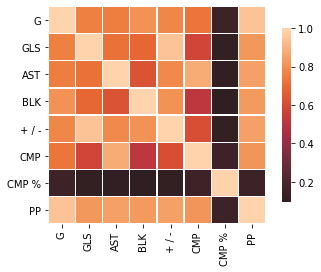

In [8]:
#lets look at the correlation between stats before normalization
dep_df = df.drop(labels=['Player', 'GPG', 'APG', 'BPG', '+/- PG', 'CPG', 'PPG'], axis=1, index=None)

sns.heatmap(dep_df[['G', 'GLS', 'AST', 'BLK', '+ / -', 'CMP', 'CMP %', 'PP']].corr(), center=0, robust=True, square=True, linewidths=.5, cbar_kws={"shrink": .8})

Lots of correlation between '+/-' and GLS (duh), also between games playes 'G' and points played 'PP'. Let's look at this for the entire set of data

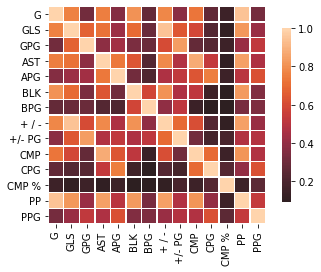

In [9]:
sns.heatmap(df.corr(), center=0, robust=True, square=True, linewidths=.5, cbar_kws={"shrink": .8})

what this tells me is that there's little correlation between X and X per game stats. This intuitively makes sense because everything in the 'per game' category is normalized. If we wanted to compare everyone else on an entirely different plane, we could create 'per point' columns that show how affective players are on a given point.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002805CF1F278>],
      dtype=object)

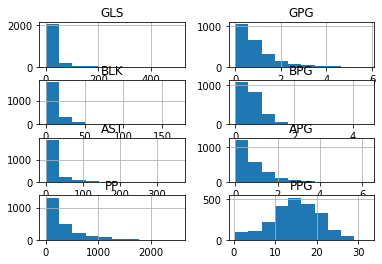

In [10]:
#Let's look at distributions of the 4 primary stats (GLS, AST, BLK, CMP) v. their per game dist
fig, axs = plt.subplots(4, 2)

df.hist('GLS', ax=axs[0, 0])
df.hist('GPG', ax=axs[0, 1])
df.hist('BLK', ax=axs[1, 0])
df.hist('BPG', ax=axs[1, 1])
df.hist('AST', ax=axs[2, 0])
df.hist('APG', ax=axs[2, 1])
df.hist('PP', ax=axs[3, 0])
df.hist('PPG', ax=axs[3, 1])

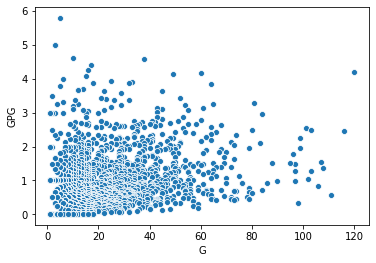

In [11]:
# scatter num_games v. ppg -> linear regression w/ highlights
    # https://stackoverflow.com/questions/7908636/possible-to-make-labels-appear-when-hovering-over-a-point-in-matplotlib

sns.scatterplot(data=df, x='G', y='GPG')

Time for some feature engineering! For each player we have the total goals, assists, and blocks. We also have their plus/minus. The plus/minus for each player is equal to Assists + Blocks + Goals - Turnovers. Here the total number of turnovers each player has is calculated.

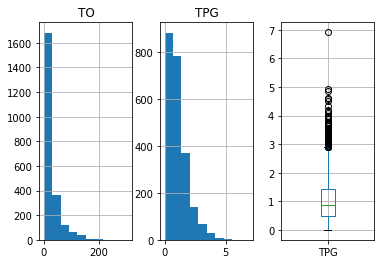

In [12]:
# Calculate turnovers and turnovers per game from other attributes
df['TO'] = df.apply(lambda x: x.AST + x.BLK + x.GLS - x['+ / -'], axis=1)
df['TPG'] = df.apply(lambda x: x.TO / x.G, axis=1)

fig, axs = plt.subplots(1, 3)

df.hist('TO', ax=axs[0])
df.hist('TPG', ax=axs[1])
df.boxplot('TPG', ax=axs[2])

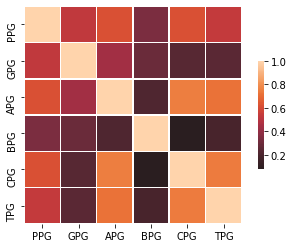

In [13]:
dep_df = df.drop(labels=['Player', 'G', 'AST', 'BLK', '+ / -', 'CMP', 'PP'], axis=1, index=None)

sns.heatmap(dep_df[['PPG', 'GPG', 'APG', 'BPG', 'CPG', 'TPG']].corr(), center=0, robust=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

high correlation between assists, completions, and turnovers per game. Does completion rate go up with the number of throws? 

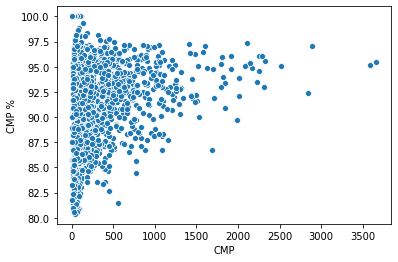

In [14]:
temp_df = df[df['CMP %'] > 80]
sns.scatterplot(data=temp_df, x='CMP', y='CMP %')

The data gets a little sparse with CMP > 1500 and/or CMP % < 80. Let's look at the standard deviation and variance of completions per game. This will heplp give a good idea of how big the range is for throwers. Also, throws per game is indicative of who handlers are and aren't, but if you're a professional level team, I think most people are getting in throws on almost every point. What does separate players is their scoring effectiveness (assists and goals). Two columns of data that would've been really helpful would be designating each player as offensive, defensive, or both, and designating players as handler, cutter, or both. 

As shown above, the more assists you have, the more turnovers you tend to have (per game). I think this is because, the more you throw in general, the more turnovers, but that doesn't equate to a better/worse turnover percentage. It's the same with assists.The problem is, there are so many data points with a very low number of completions overall.

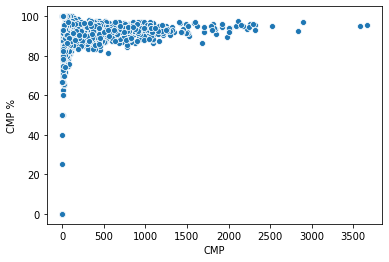

In [15]:
# temp_df = df[df[''] > 80]
sns.scatterplot(data=df, x='CMP', y='CMP %')

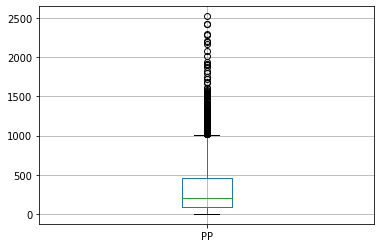

In [16]:
# df.boxplot('PP', return_type='both')
import numpy as np
np.quantile(df['PP'], q=[0.05, 0.1, 0.15, 0.25, 0.35, 0.45, 0.5, 0.75, 0.85, 0.9, 0.95]) # ->[  14. ,   30. ,   47.6,   86. ,  128. ,  176.8,  205. ,  454. , 669.4,  827.6, 1091.6])

df.boxplot('PP')


So to keep 90% of the data, we would want to select all players who have played 30 points or more across their career. This still seems low so I'm going to go with all players who have played 130 points or more (or just over 65% of players).

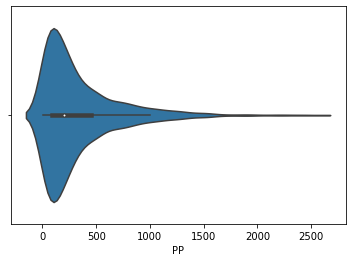

In [17]:
ax = sns.violinplot(x=df.PP)

1. identify cut-off point for PP where everyone below that number is removed (see quantile cell above). Number of points played is our 'normalizing' factor that's representative of how much 'time' each player has had to played ✅

2. Create 'Per Point' columns for Assists, Blocks, Goals, +/-, and completions. ✅

3. Check the variance of attributes in log scale (https://towardsdatascience.com/learn-linear-regression-using-scikit-learn-and-nba-data-data-science-with-sports-9908b0f6a031). If there's high variance, scale variables the same way the article does.

### END OF EDA / BEGINNING OF MODEL DEVELOPMENT ###

4. Use this (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) chart to determine the appropriate type of model to use to predict Goals per point.

5. Develop model, splitting training and testing 80/20. And reveiw results.



In [18]:
# looking at the dispersion of number of points played, we're only going to look at players who have played at least 50 point. According to the PPG (Points Played Per Game) distribution, for the average player this is at least 3 games worth of playing time
df = df[df['PP'] > 50]
print(f"New Shape: {df.shape}")

New Shape: (1920, 17)


In [19]:
# now we want to look at the stats on a per point basis to help normalize data across our 'time played' estimate
df['APP'] = df.apply(lambda x: x.AST / x.PP, axis=1)
df['BPP'] = df.apply(lambda x: x.BLK / x.PP, axis=1)
df['GPP'] = df.apply(lambda x: x.GLS / x.PP, axis=1)
df['+/- PP'] = df.apply(lambda x: x['+ / -'] / x.PP, axis=1)
df['CPP'] = df.apply(lambda x: x.CMP / x.PP, axis=1)

print(f"New Shape: {df.shape}")

New Shape: (1920, 22)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002805E517CC0>],
      dtype=object)

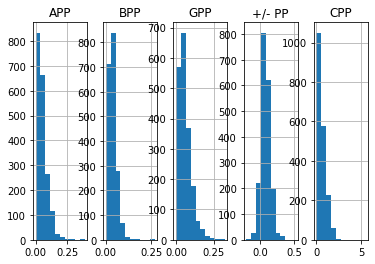

In [20]:
#now let's look at the distribution of these stats that've been normalized by points played
fig, axs = plt.subplots(1,5)

df.hist('APP', ax=axs[0])
df.hist('BPP', ax=axs[1])
df.hist('GPP', ax=axs[2])
df.hist('+/- PP', ax=axs[3])
df.hist('CPP', ax=axs[4])

<bound method NDFrame.describe of              Player   G  GLS   GPG  AST   APG  BLK   BPG  + / -  +/- PG  ...  \
333  Kyle Stapleton  51   43  0.84   79  1.55   24  0.47     85    1.67  ...   

     CMP %    PP    PPG  TO       TPG       APP       BPP       GPP    +/- PP  \
333   96.3  1079  21.16  61  1.196078  0.073216  0.022243  0.039852  0.078777   

          CPP  
333  1.378128  

[1 rows x 22 columns]>

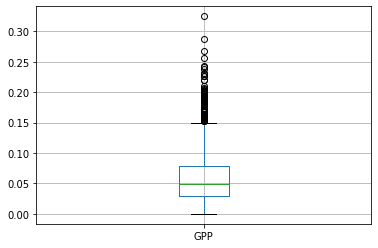

In [21]:
df.boxplot('GPP')

abc = df[df['Player'] == 'Kyle Stapleton']
abc.describe

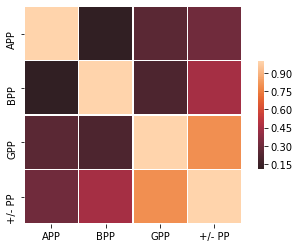

In [22]:
sns.heatmap(df[['APP', 'BPP', 'GPP', '+/- PP']].corr(), center=0, robust=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

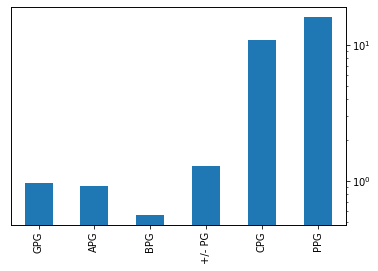

In [23]:
stat_df = df[['GPG', 'APG', 'BPG','+/- PG', 'CMP', 'CPG', 'CMP %', 'PP', 'PPG', 'APP', 'BPP', 'GPP','+/- PP', 'CPP']]
pp_df = df[['APP', 'BPP', 'GPP','+/- PP', 'CPP']]
pg_df = df[['GPG', 'APG', 'BPG','+/- PG', 'CPG', 'PPG']]

avg_pp_series = pp_df.mean(axis=0)
std_pp_series = pp_df.mean(axis=0)

avg_pg_series = pg_df.mean(axis=0)
std_pg_series = pg_df.mean(axis=0)

avg_pg_series.plot(kind='bar', logy=True, secondary_y=True, )


In [33]:
from sklearn import preprocessing

scale_df = preprocessing.StandardScaler().fit(stat_df)
X = scale_df.transform(stat_df)
X = pd.DataFrame(X)

# apply column headers


# save to CSV


<bound method NDFrame.head of             0         1         2         3         4         5         6   \
0     4.140487  1.199093 -0.454140  2.740044  3.216677  0.205046 -0.194831   
1     1.928395  2.602595 -0.783281  2.081404  8.536261  2.178783  0.883856   
2     2.964115  0.851217 -0.015286  2.494046  3.353739  0.941531  1.153527   
3     2.043475 -0.600268 -0.755853  1.256120  1.041776 -0.440193  1.008319   
4     1.966755  2.398667  1.356135  2.406757  4.041639  0.768816 -0.008136   
5     4.114914  1.870855  1.109279  3.930358  1.977940  0.719934  0.883856   
6     2.554941  0.743255  2.562985  2.819399  1.887427  0.132267  0.531208   
7     3.705741 -0.000481 -0.481569  2.501982  1.434862  0.244152  1.029063   
8     1.634302  2.818518  2.316129  2.335338  4.401105  1.000189 -0.257063   
9     2.938541  2.662574  2.590413  3.660554  1.659851  0.367986 -0.153343   
10    4.063767  0.611302  1.410992  3.184428  2.130520  1.276100  0.987575   
11    1.966755  0.767246  2.233844